# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\ADMIN\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\ADMIN\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\ADMIN\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\ADMIN\anaconda3\Lib\site-packages\setuptools\_v

In [3]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
anyio              

In [5]:
import tensorflow as tf
import os

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [9]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [16]:
!pip install opencv-python
!pip install opencv-contrib-python
import cv2


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB 9.9 MB/s eta 0:00:04
    --------------------------------------- 0.7/38.8 MB 8.3 MB/s eta 0:00:05
   - -------------------------------------- 1.0/38.8 MB 8.1 MB/s eta 0:00:05
   - -------------------------------------- 1.3/38.8 MB 7.6 MB/s eta 0:00:05
   - -------------------------------------- 1.6/38.8 MB 7.4 MB/s eta 0:00:06
   -- ------------------------------------- 2.1/38.8 MB 7.7 MB/s eta 0:00:05
   -- ------------------------------------- 2.1/38.8 MB 7.1 MB/s eta 0:00:06
   -- ------------------------------------- 2.1/38.8 MB 7.1 MB/s eta 0:00:06
   -- ------------------------------------- 2.9/38.8 MB 7.3 MB/s eta 0:00:05
   --- ------------------------------------ 3.1/38.8 MB 6.7 MB/s eta 0:00:06
   --- ------------------------------------ 3.7/38.8 MB 7.5 MB/s eta 0:00:05
   ---- ----------------------------------- 4.0/38.8 MB 7.4 MB/s eta 0:00:05
   ---

In [17]:
import cv2
import imghdr

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10900\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [20]:
data_dir = 'data' 

In [22]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [24]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [27]:
import numpy as np
from matplotlib import pyplot as plt

In [29]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [31]:
data_iterator = data.as_numpy_iterator()

In [33]:
batch = data_iterator.next()

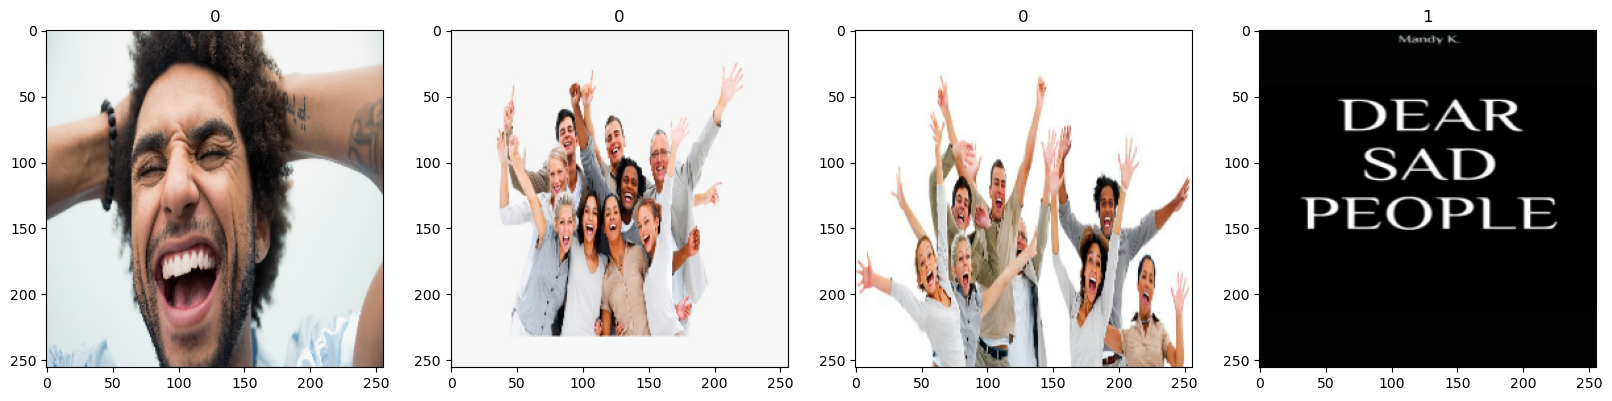

In [35]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [38]:
data = data.map(lambda x,y: (x/255, y))

In [40]:
data.as_numpy_iterator().next()

(array([[[[3.8106617e-01, 3.9675245e-01, 4.3988970e-01],
          [3.9025736e-01, 4.0594363e-01, 4.4908088e-01],
          [3.9944854e-01, 4.1513482e-01, 4.5827207e-01],
          ...,
          [3.3838847e-01, 3.4509805e-01, 3.8207722e-01],
          [3.3042279e-01, 3.3927697e-01, 3.8330269e-01],
          [3.4016544e-01, 3.4800857e-01, 3.9506739e-01]],
 
         [[3.8370097e-01, 3.9938724e-01, 4.4252452e-01],
          [3.9289215e-01, 4.0857843e-01, 4.5171568e-01],
          [4.0095118e-01, 4.1663748e-01, 4.5977473e-01],
          ...,
          [3.3838847e-01, 3.4509805e-01, 3.8207722e-01],
          [3.3237830e-01, 3.4318799e-01, 3.8134718e-01],
          [3.4039187e-01, 3.4846145e-01, 3.9484099e-01]],
 
         [[3.8676471e-01, 4.0245098e-01, 4.4736519e-01],
          [3.9595589e-01, 4.1164216e-01, 4.5655638e-01],
          [4.0346202e-01, 4.1914830e-01, 4.6406251e-01],
          ...,
          [3.4016544e-01, 3.4687501e-01, 3.8385418e-01],
          [3.3379146e-01, 3.4555617e-

# 5. Split Data

In [43]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [45]:
train_size

7

In [47]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [50]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [54]:
model = Sequential()

In [56]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [63]:
logdir='logs'

In [65]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [67]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5054 - loss: 0.9143 - val_accuracy: 0.6406 - val_loss: 0.6824
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5282 - loss: 0.6873 - val_accuracy: 0.5938 - val_loss: 0.6696
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 991ms/step - accuracy: 0.6401 - loss: 0.6686 - val_accuracy: 0.7031 - val_loss: 0.5677
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7984 - loss: 0.5335 - val_accuracy: 0.7969 - val_loss: 0.5058
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7895 - loss: 0.4636 - val_accuracy: 0.8594 - val_loss: 0.3512
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9015 - loss: 0.3022 - val_accuracy: 0.9531 - val_loss: 0.1954
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9630 - loss: 0.1757 - val_accuracy: 1.0000 - val_loss: 0.0868
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9724 - loss: 0.1026 - val_accuracy: 0.9844 - val_loss: 0.0690
Epoch 9/20

# 8. Plot Performance

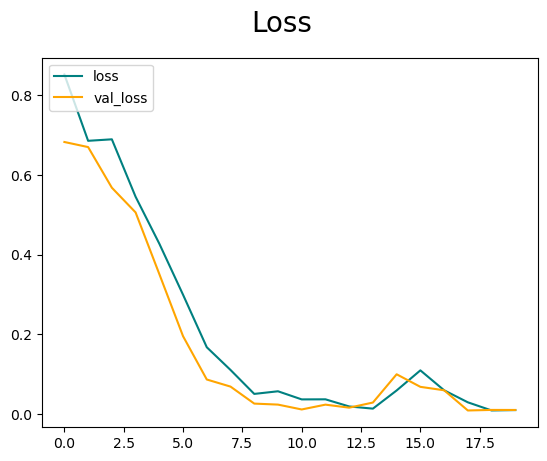

In [70]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

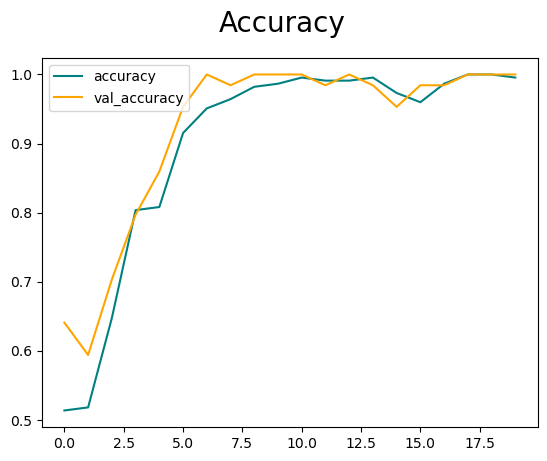

In [72]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [75]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [77]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [79]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [81]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [84]:
import cv2

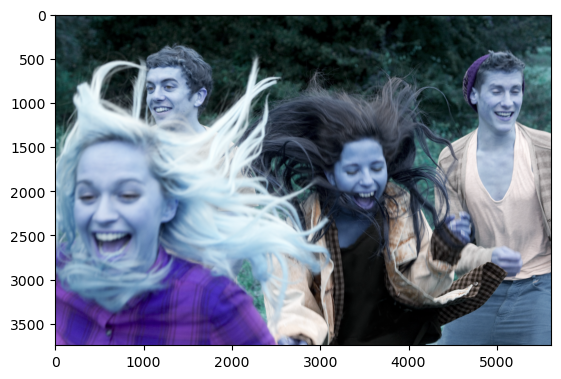

In [86]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

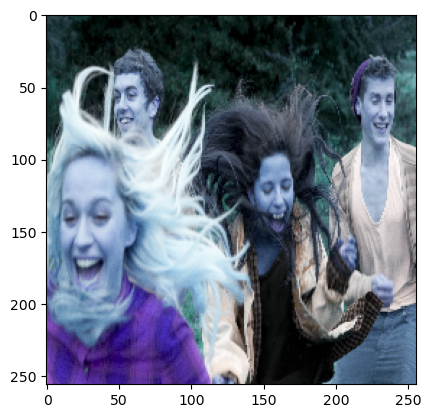

In [88]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [90]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


In [92]:
yhat

array([[1.6070923e-07]], dtype=float32)

In [94]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [97]:
from tensorflow.keras.models import load_model

In [119]:
model.save(os.path.join('models','happysad.h5'))

In [121]:
new_model = load_model('imageclassifier.h5')

In [126]:
yhatnew=new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [130]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
